In [87]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(-1.0, 1.0)

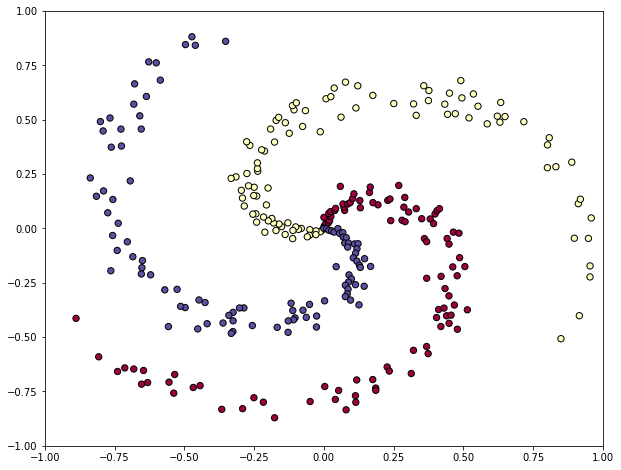

In [97]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,edgeColor='k',cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [ ]:
#Creating output Layer

In [98]:
h=100

In [99]:
W = 0.01*np.random.randn(D,h) #2,100

In [100]:
b = np.zeros((1,h)) #1,100

In [101]:
W2 = 0.01*np.random.randn(h,K)#100,3
b2 = np.zeros((1,K))

In [102]:
step_size = 1e-0
reg = 1e-3

In [67]:
np.zeros((10,3))+np.array(range(1,11)).reshape(10,1)

array([[ 1.,  1.,  1.],
       [ 2.,  2.,  2.],
       [ 3.,  3.,  3.],
       [ 4.,  4.,  4.],
       [ 5.,  5.,  5.],
       [ 6.,  6.,  6.],
       [ 7.,  7.,  7.],
       [ 8.,  8.,  8.],
       [ 9.,  9.,  9.],
       [10., 10., 10.]])

In [103]:
m = X.shape[0]

In [ ]:
np.dot(X,W)[6]

In [ ]:
np.maximum(0,np.dot(X,W)+b)#


In [104]:
for i in range(10000):
    hidden_layer_ouptut = np.maximum(0,np.dot(X,W)+b)#(300,100) #----reLU
    scores = np.dot(hidden_layer_ouptut,W2)+b2#300,3)
    #Computing class prob
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores,axis=1,keepdims=True)  #soft max prob(300,3)
    #total loss(just for graph)
    correct_logprobs = -np.log(probs[range(m),y])#300,1
    data_loss = np.sum(correct_logprobs)/m
    #Regulrization
    reg_loss = 0.5 * reg* np.sum(W*W)+ 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i%1000 == 0:
        print(f"iter {i}: loss {loss}")
    # gradient of loss(y^ - y)
    dprobs = probs #300,3
    dprobs[range(m),y]-=1
    dprobs/=m #300,3--?
    
    ## Backdrop into parameter W2,b2
    dW2 = np.dot(hidden_layer_ouptut.T,dprobs) #100,3
    db2 = np.sum(dprobs,axis = 0, keepdims=True)
    
    
    ## backdrop into hidden layer
    dhidden = np.dot(dprobs,W2.T)
    dhidden[hidden_layer_ouptut<=0]=0 ##backdroping reLU
    
    dW = np.dot(X.T,dhidden)#2,100
    db = np.sum(dhidden,axis =0,keepdims=True)
    
    dW2 += reg*W2
    dW += reg*W
    
    W -= step_size * dW
    b -= step_size * db
    
    W2 -= step_size * dW2
    b2 -= step_size * db2

iter 0: loss 1.0987647090609558
iter 1000: loss 0.2922783350038034
iter 2000: loss 0.2565879365770127
iter 3000: loss 0.24821728471460294
iter 4000: loss 0.2461824773206865
iter 5000: loss 0.24566682668836476
iter 6000: loss 0.2454371954471567
iter 7000: loss 0.24528125215015745
iter 8000: loss 0.24517695787726373
iter 9000: loss 0.24509585900012293
iter 10000: loss 0.2450306156458142
iter 11000: loss 0.24497940293720155
iter 12000: loss 0.24493659836518927
iter 13000: loss 0.24489989126767503
iter 14000: loss 0.24487017119289878
iter 15000: loss 0.24484414062105786
iter 16000: loss 0.24481982833438048
iter 17000: loss 0.24480248362986973
iter 18000: loss 0.24478572077729255
iter 19000: loss 0.24477623196888731


In [107]:
## accuracy
hidden_layer = np.maximum(0,(np.dot(X,W)+b))
scores = np.dot(hidden_layer,W2)+b2
predicted_class = np.argmax(scores, axis=1)
print(np.mean(predicted_class == y))

0.98


(-1.8712034092398278, 1.8687965907601756)

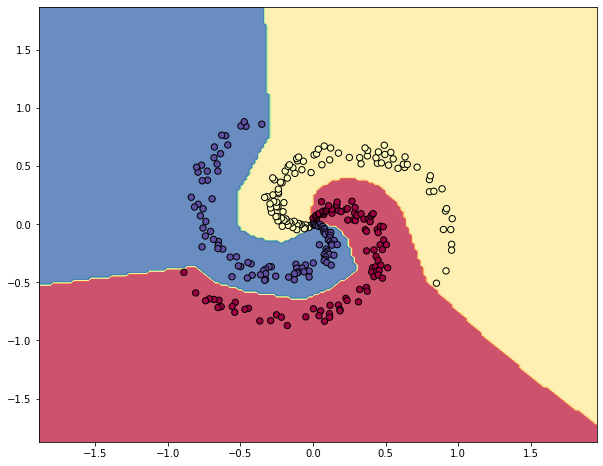

In [109]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='k',cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')